<a href="https://colab.research.google.com/github/Atrayee98/Cluster-Analysis-on-Wine-dataset/blob/main/Atrayee_Dutta_ChowdhuryDS101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("winedata.csv")
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

**There are no null values in our dataset**

In [ ]:
np.isinf(data).values.sum()

0

**There are no infinite values in our dataset**



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

**All the variables are of float type except Magnesium and Proline which are integer**

In [ ]:
data.shape

(178, 13)

**There are 178 entries and 13 variables in our dataset**

In [ ]:
data.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.duplicated().sum()

0

**There are no duplicate values in our data**

## Univariate EDA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

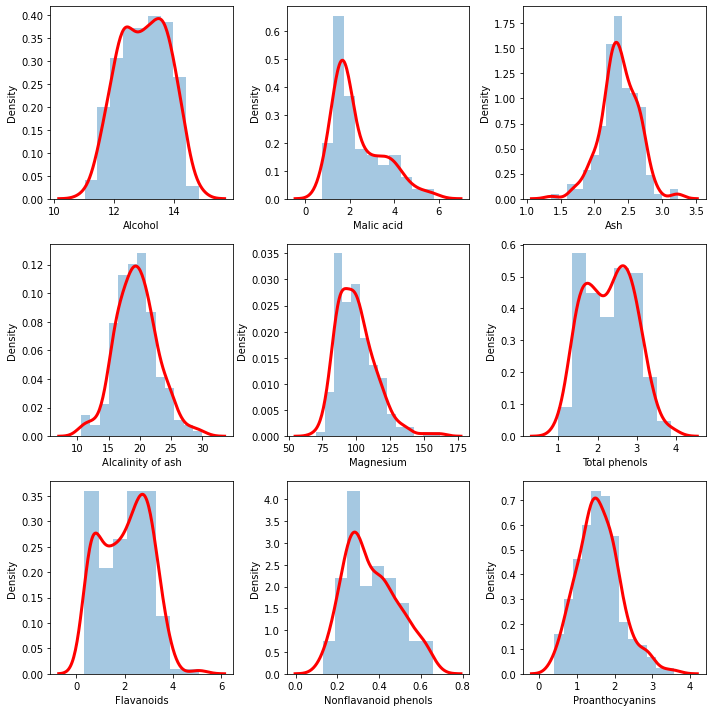

In [ ]:
rows=3
cols=3
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j],kde_kws={'linewidth':3,"color":"red"})
        index=index+1
plt.tight_layout()
plt.show()

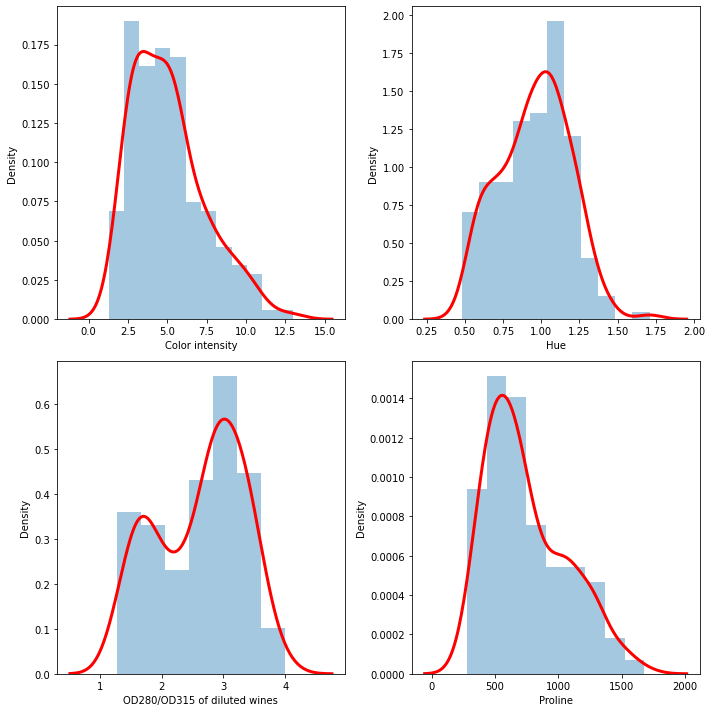

In [ ]:
rows=2
cols=2
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
col=data.columns
index=9
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j],kde_kws={'linewidth':3,"color":"red"})
        index=index+1
plt.tight_layout()
plt.show()

In [ ]:
data.skew()

Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

**None of the variables is symmetric. Alcohol,OD280/OD315 of diluted wines and Ash are negatively skewed. The other variables are positively skewed**

Normality check

In [ ]:
from scipy import stats
r_names=['column name','test statistic','p-value']
z=data.columns
d={}
for i in range(0,13):
    d[i]=[z[i],stats.shapiro(data[z[i]])[0],stats.shapiro(data[z[i]])[1]]
d
norm_test=pd.DataFrame(d,index=r_names)
norm_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
column name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
test statistic,0.981805,0.888784,0.983947,0.990225,0.938331,0.976682,0.954527,0.962522,0.980723,0.940319,0.981342,0.945047,0.931186
p-value,0.0200517,2.94593e-10,0.0386853,0.263869,6.34542e-07,0.00439575,1.67906e-05,0.000105527,0.0144534,9.22948e-07,0.0174257,2.31605e-06,1.74122e-07


From the above table it is clear none of the variables except Alcalinity of Ash follow a normal distribution

###outlier check

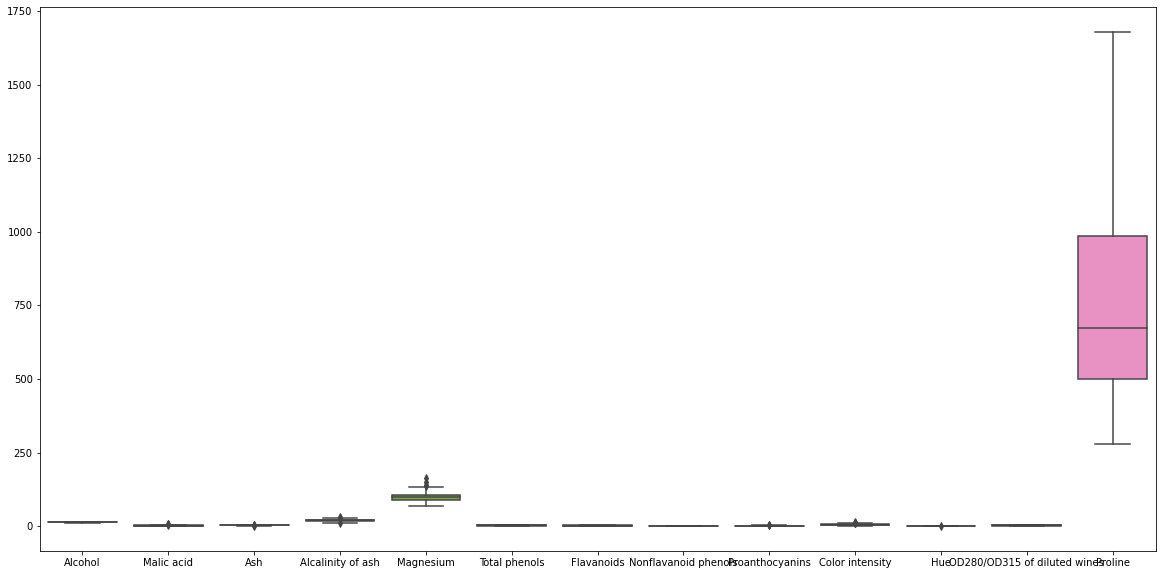

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

**Proline seems to have a much higher scale than the other variables**

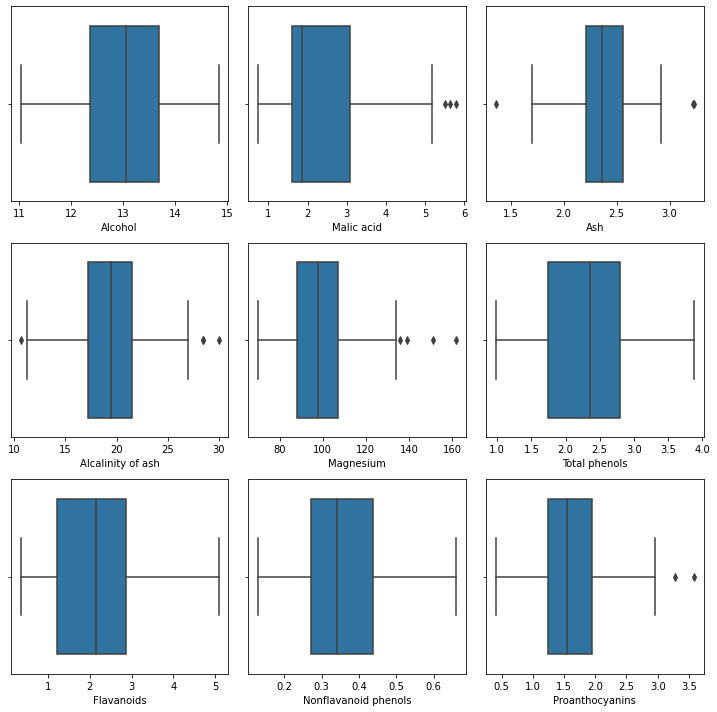

In [ ]:
rows=3
cols=3
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(data[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()
plt.show()

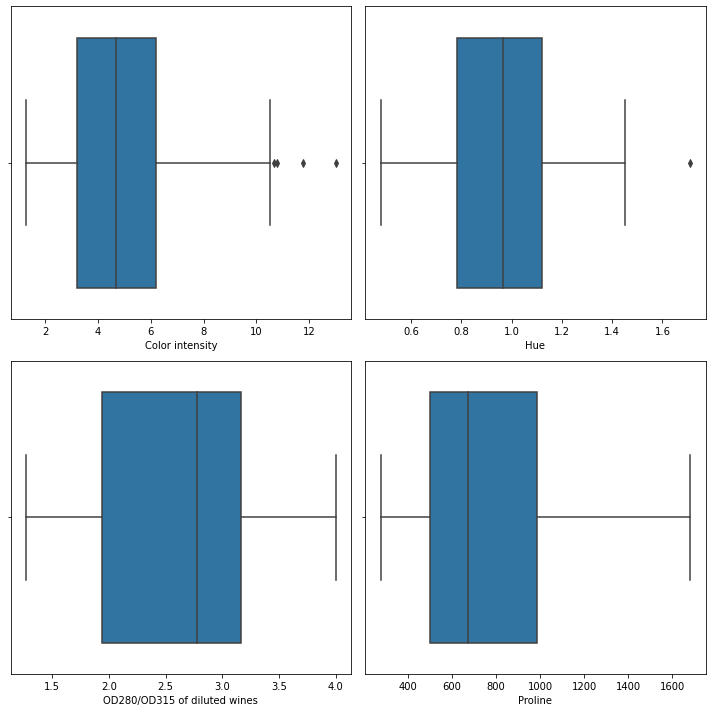

In [ ]:
rows=2
cols=2
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
col=data.columns
index=9
for i in range(rows):
    for j in range(cols):
        sns.boxplot(data[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()
plt.show()

**As is visible, the variables Malic acid, Ash, Alcalinity of Ash,Magnesium, Proanthocyanins,Color intensity, Hue seem to have outliers**

## Multivariate EDA

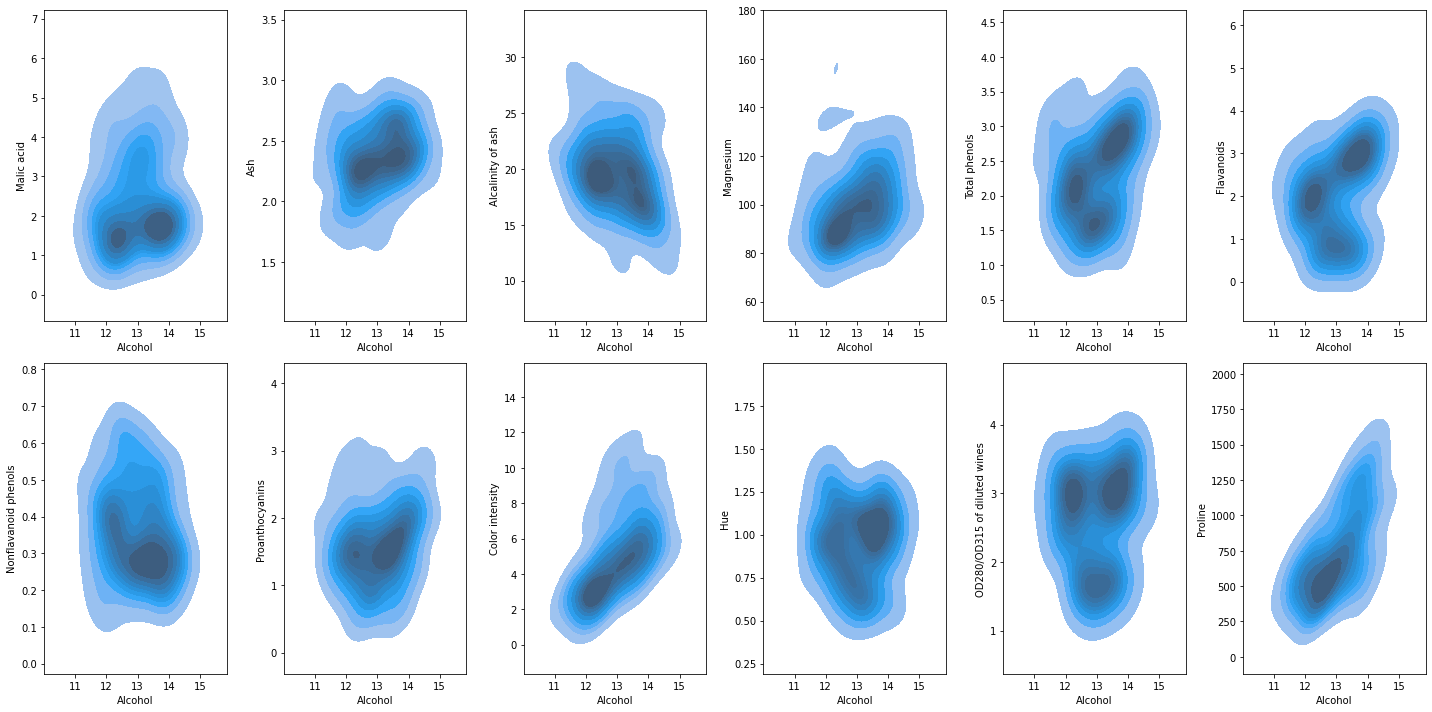

In [ ]:
#Alcohol
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Alcohol"],y=data[col[index+1]],ax=ax[i][j],fill=True)
        index=index+1
plt.tight_layout()
plt.show()

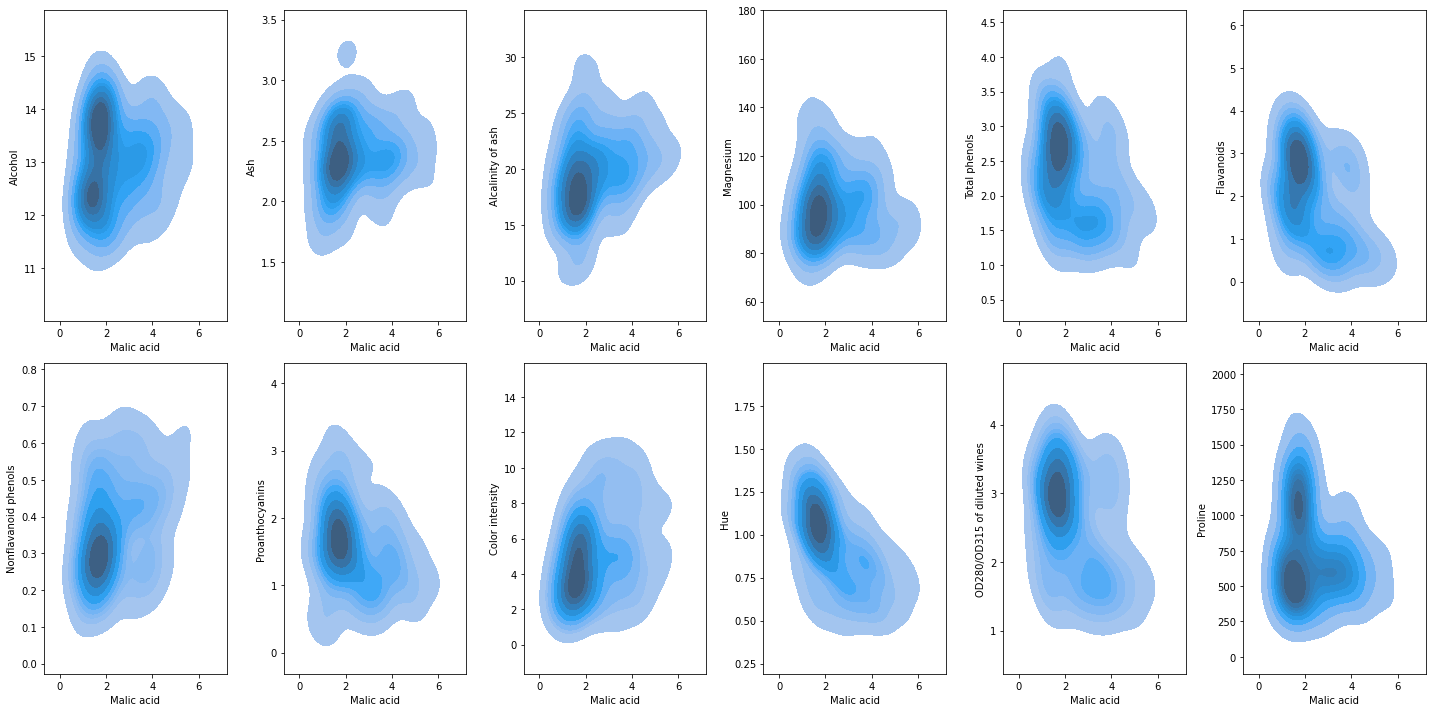

In [ ]:
#Malic acid
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Malic acid"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==1):
          index+=1
plt.tight_layout()
plt.show()

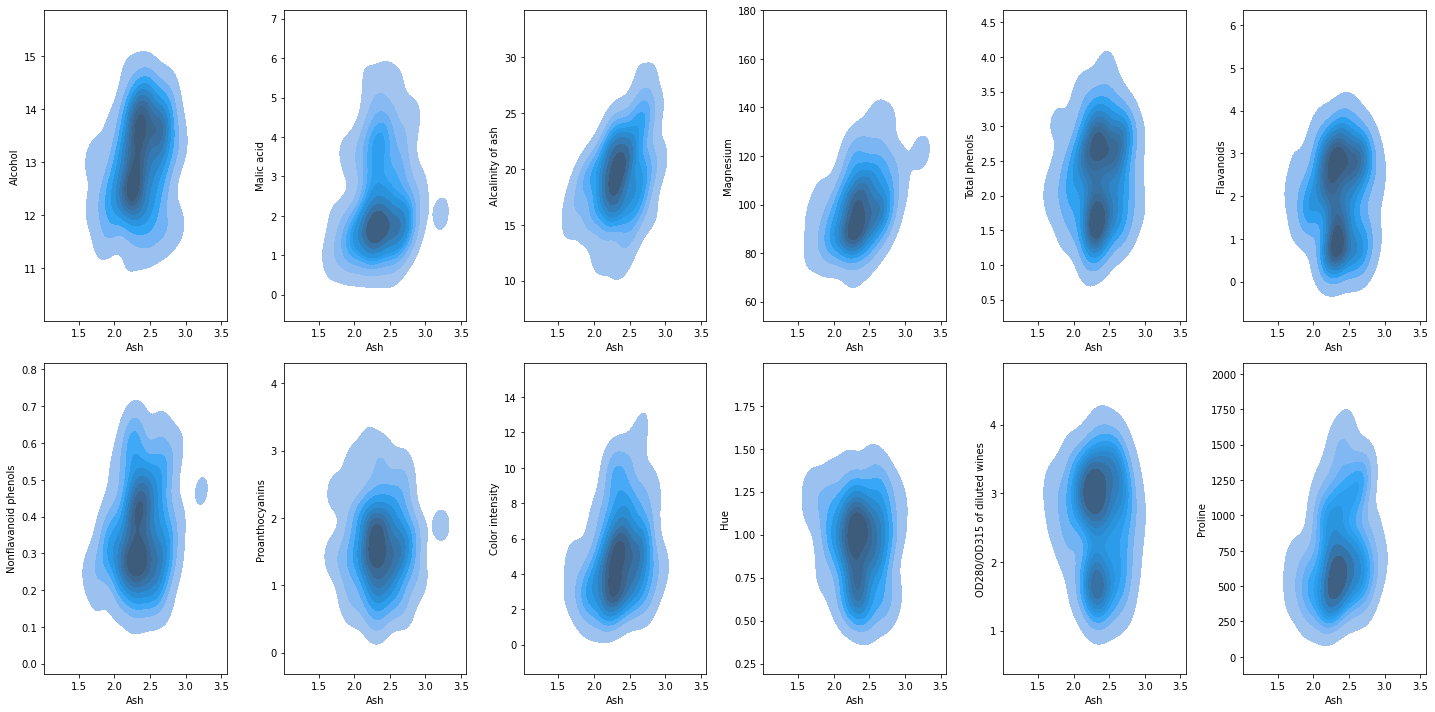

In [ ]:
#Ash
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Ash"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==2):
          index+=1
plt.tight_layout()
plt.show()

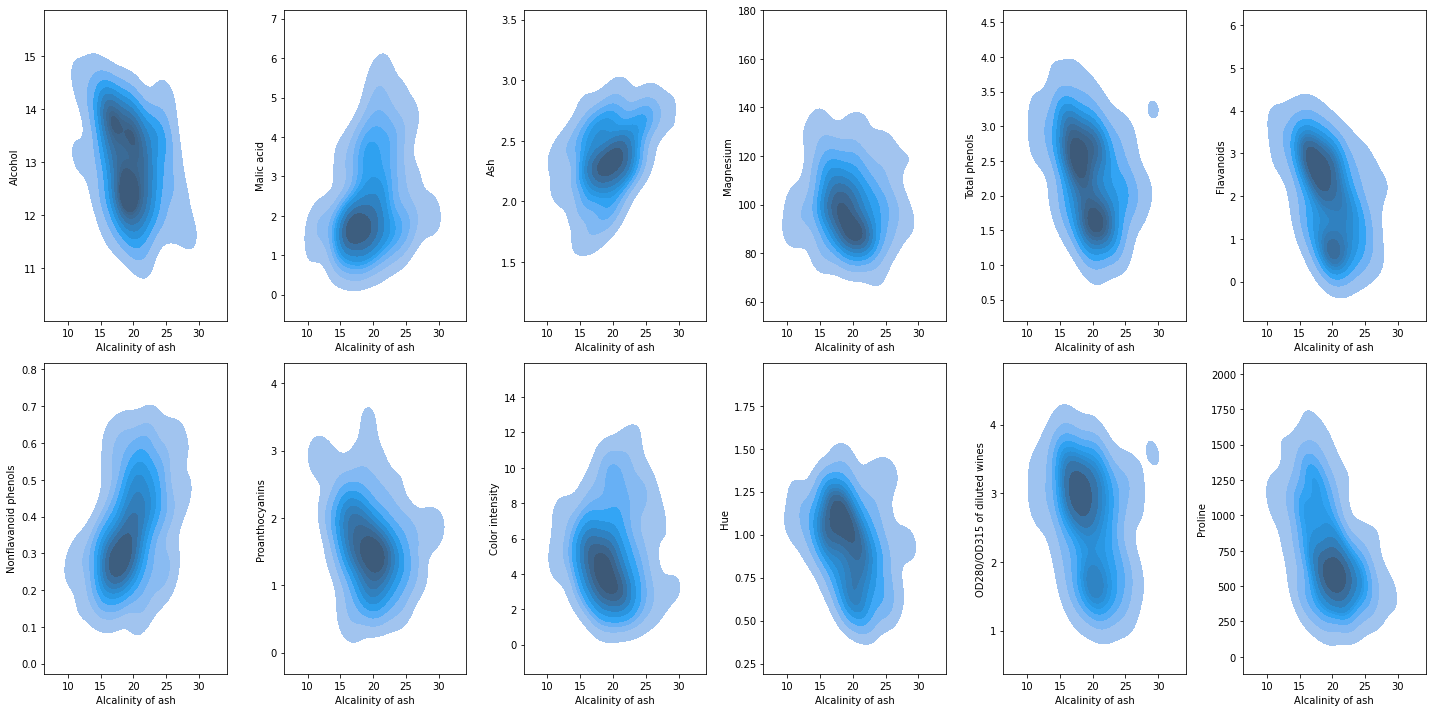

In [ ]:
#Alcalinity of ash
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Alcalinity of ash"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==3):
          index+=1
plt.tight_layout()
plt.show()

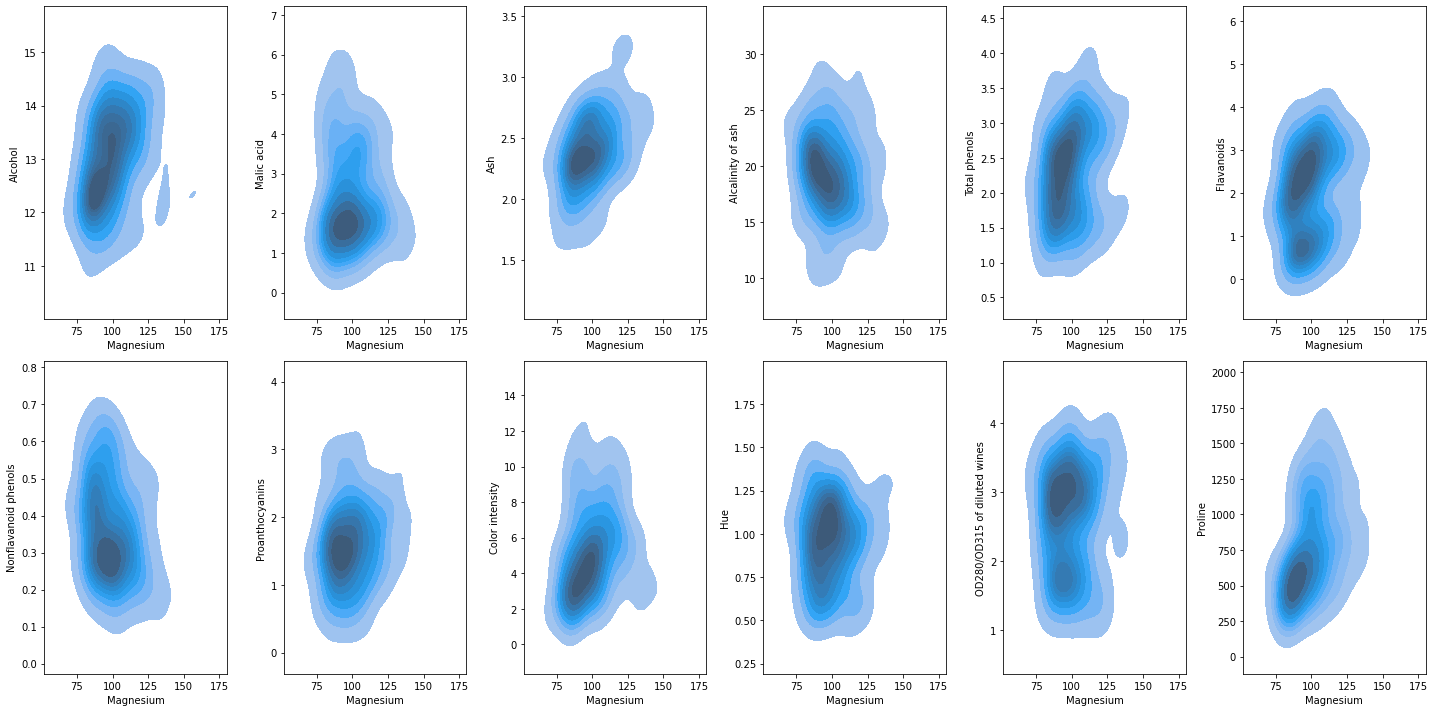

In [ ]:
#Magnesium
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Magnesium"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==4):
          index+=1
plt.tight_layout()
plt.show()

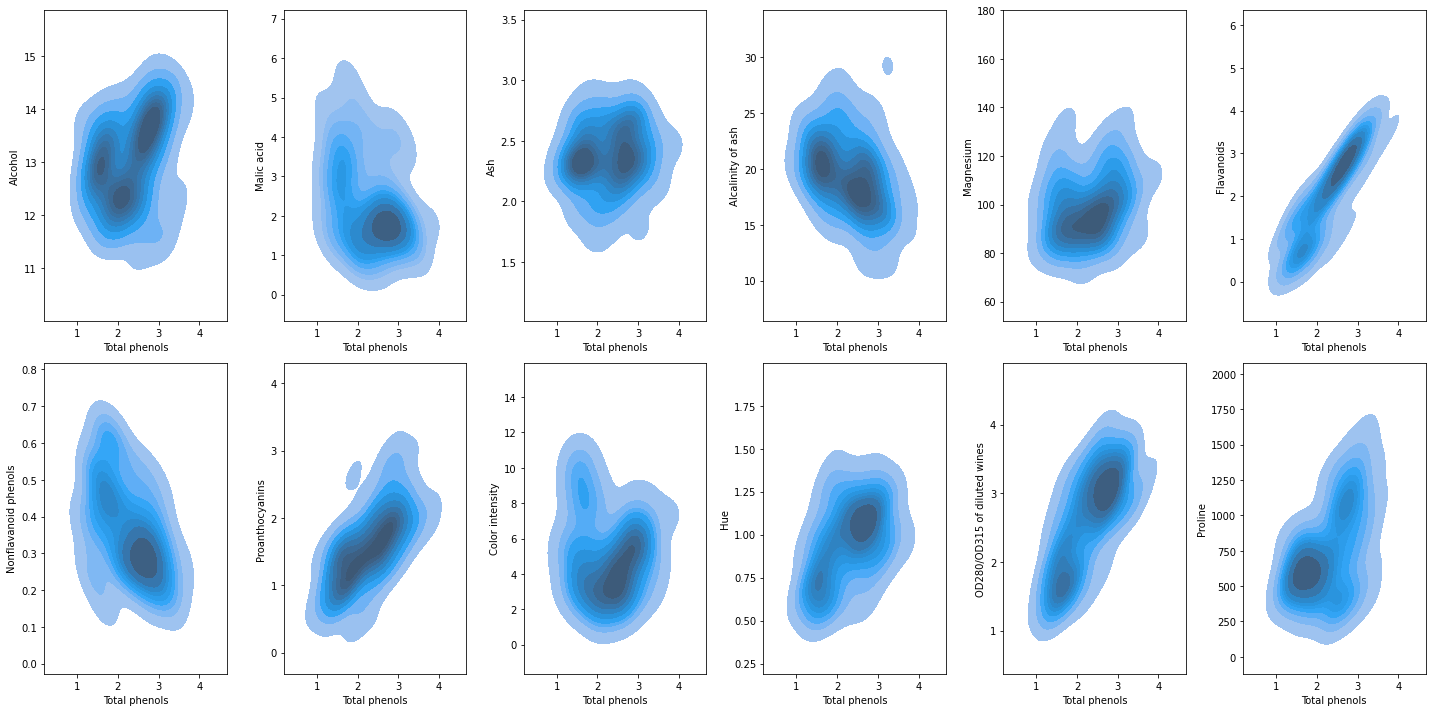

In [ ]:
#Total Phenols
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Total phenols"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==5):
          index+=1
plt.tight_layout()
plt.show()

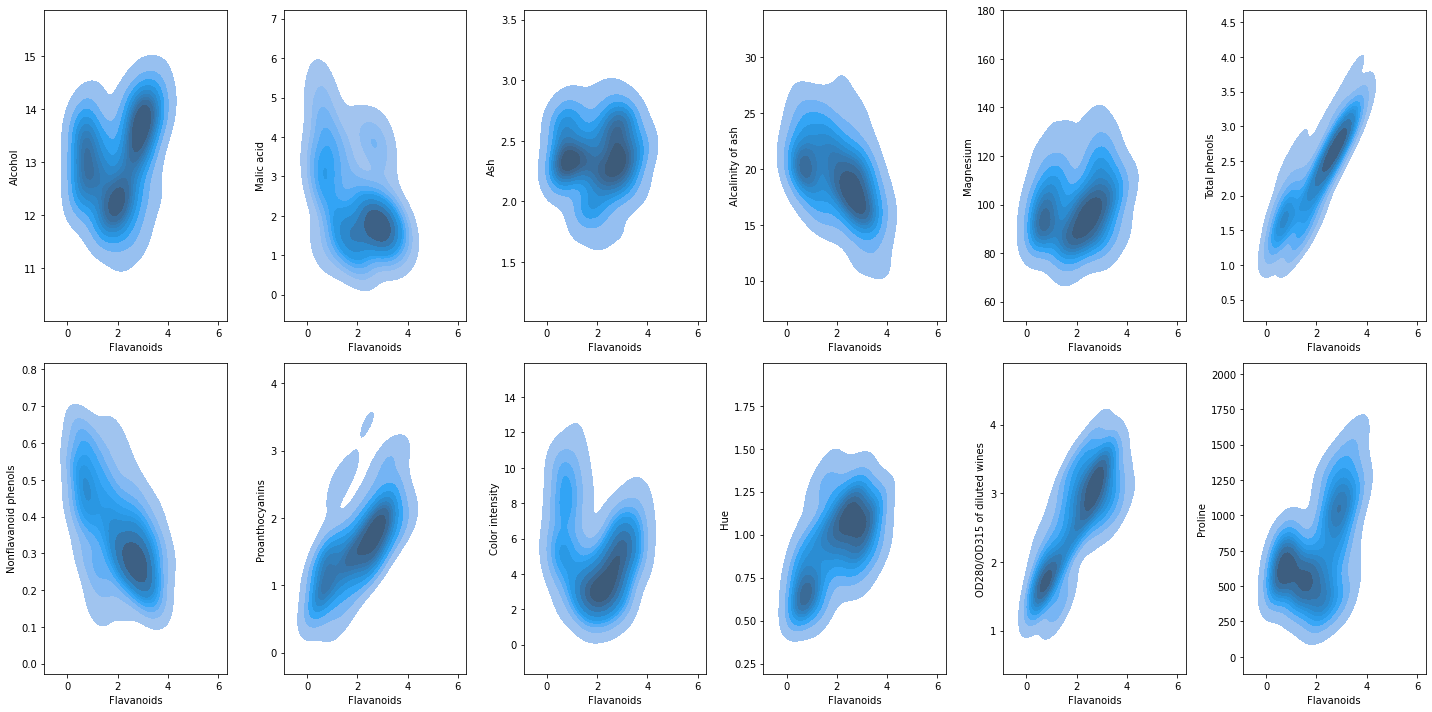

In [ ]:
#Flavanoids
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Flavanoids"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==6):
          index+=1
plt.tight_layout()
plt.show()

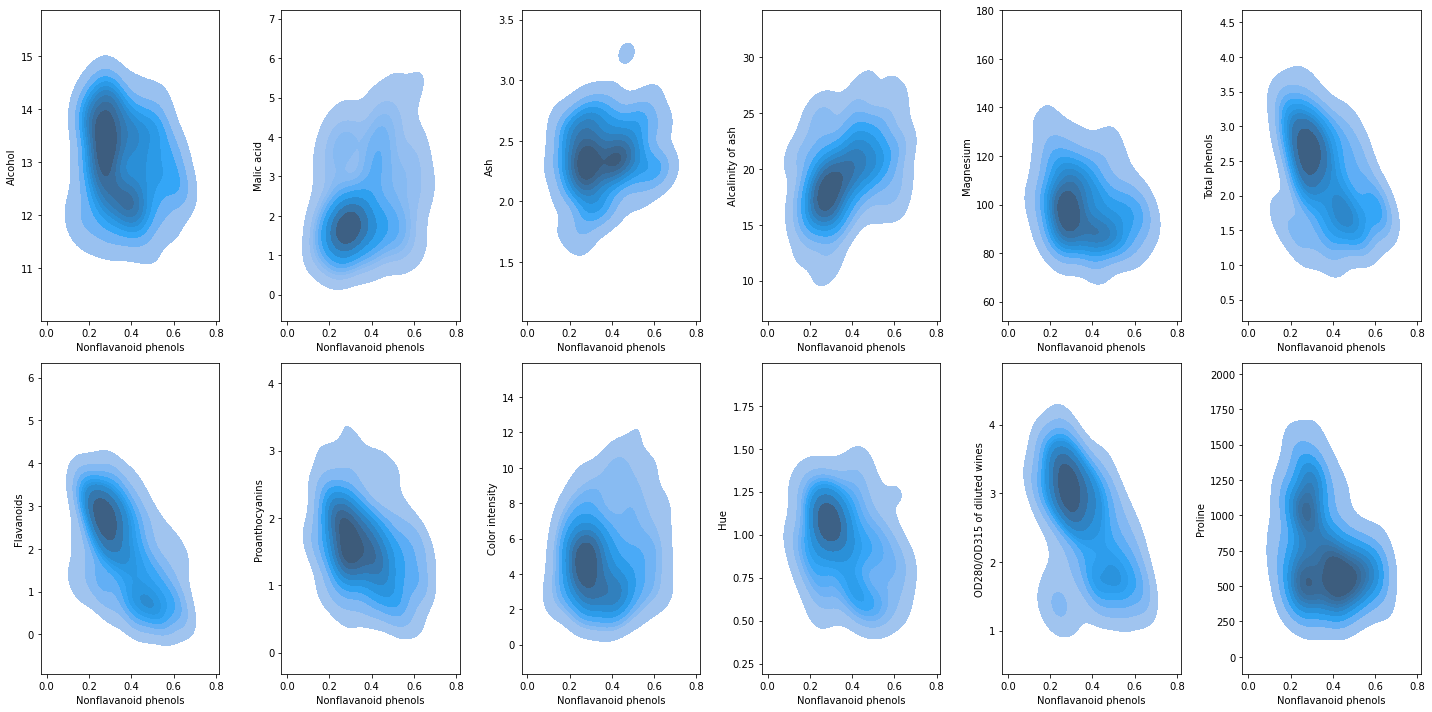

In [ ]:
#Nonflavanoid phenols
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Nonflavanoid phenols"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==7):
          index+=1
plt.tight_layout()
plt.show()

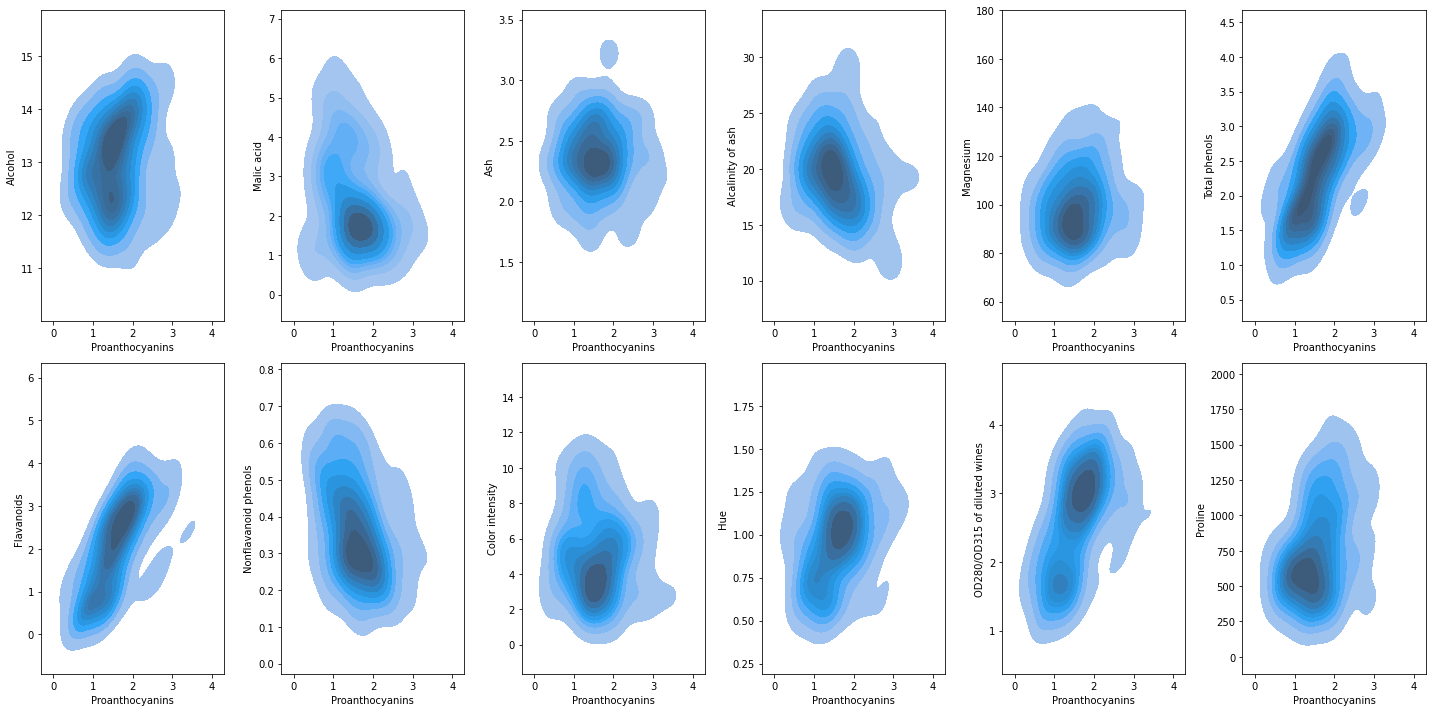

In [ ]:
#Proanthocyanins
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Proanthocyanins"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==8):
          index+=1
plt.tight_layout()
plt.show()

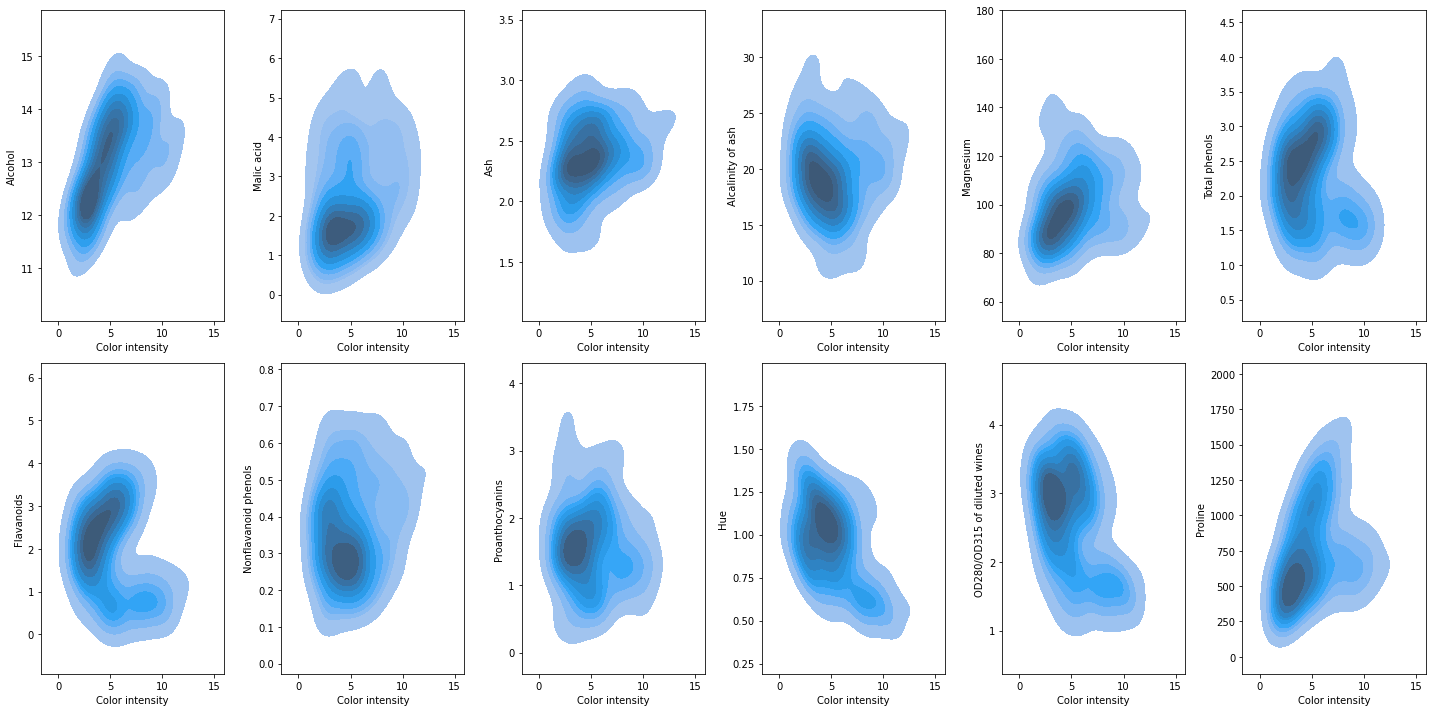

In [ ]:
#Color intensity
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Color intensity"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==9):
          index+=1
plt.tight_layout()
plt.show()

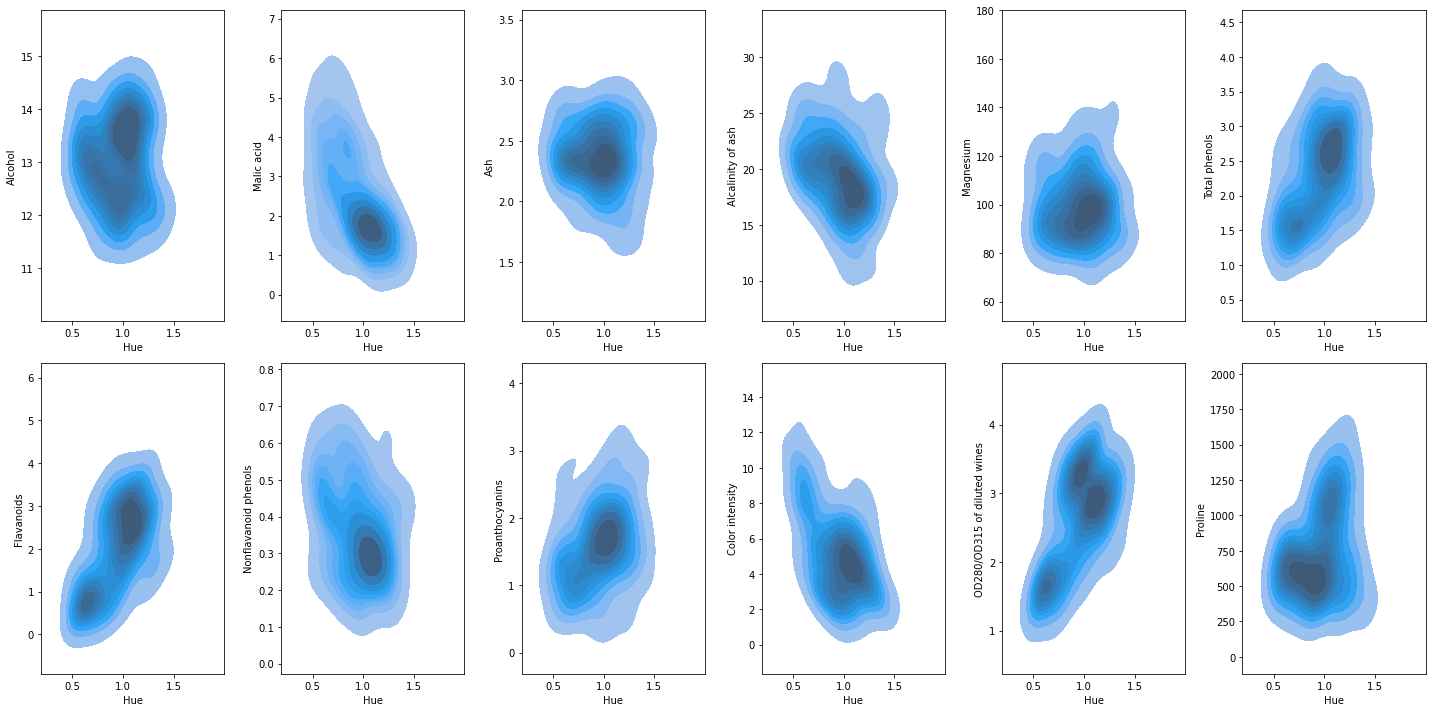

In [ ]:
#Hue
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Hue"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==10):
          index+=1
plt.tight_layout()
plt.show()

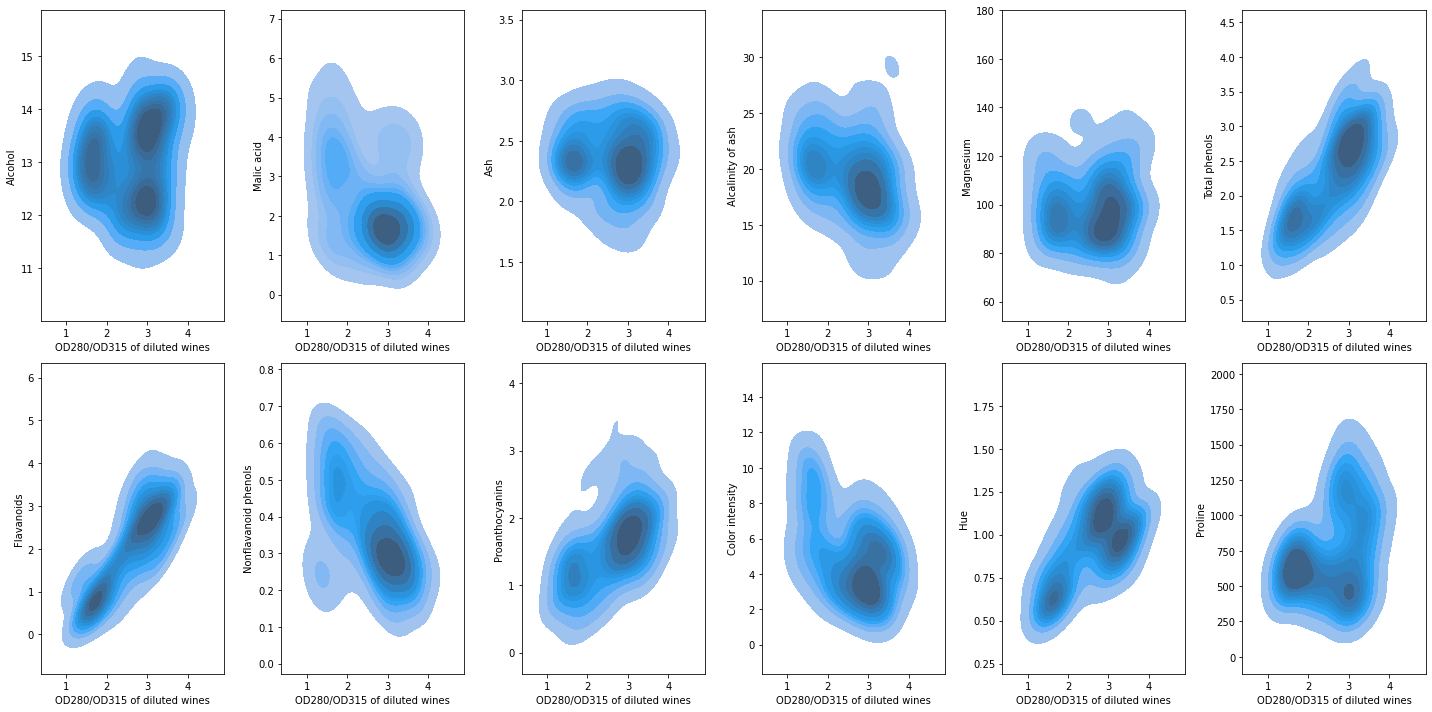

In [ ]:
#diluted wines
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["OD280/OD315 of diluted wines"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==11):
          index+=1
plt.tight_layout()
plt.show()

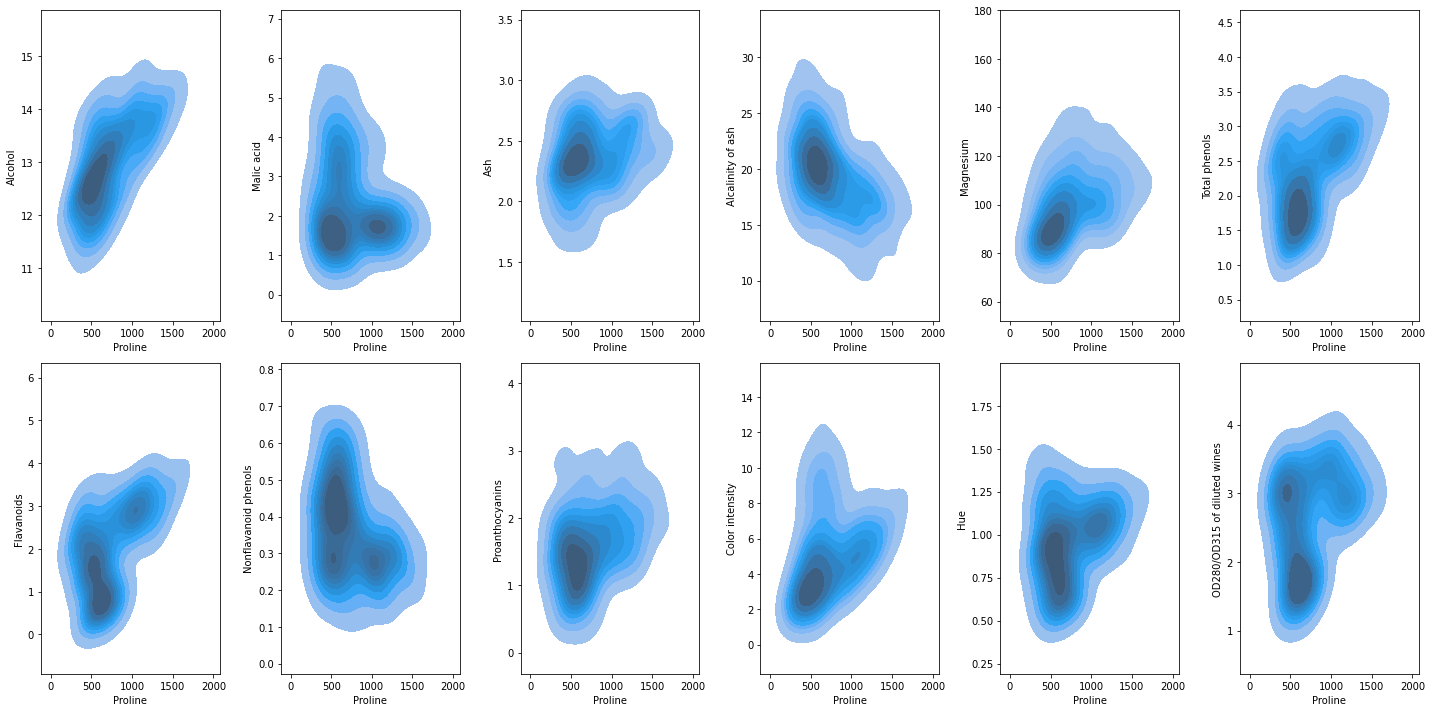

In [ ]:
#Proline
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Proline"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==12):
          index+=1
plt.tight_layout()
plt.show()

**From the bivariate Kdeplots it can be said that there might be two or at max 3 clusters**

###Checking correlation

In [ ]:
correlation=data.corr()
correlation

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


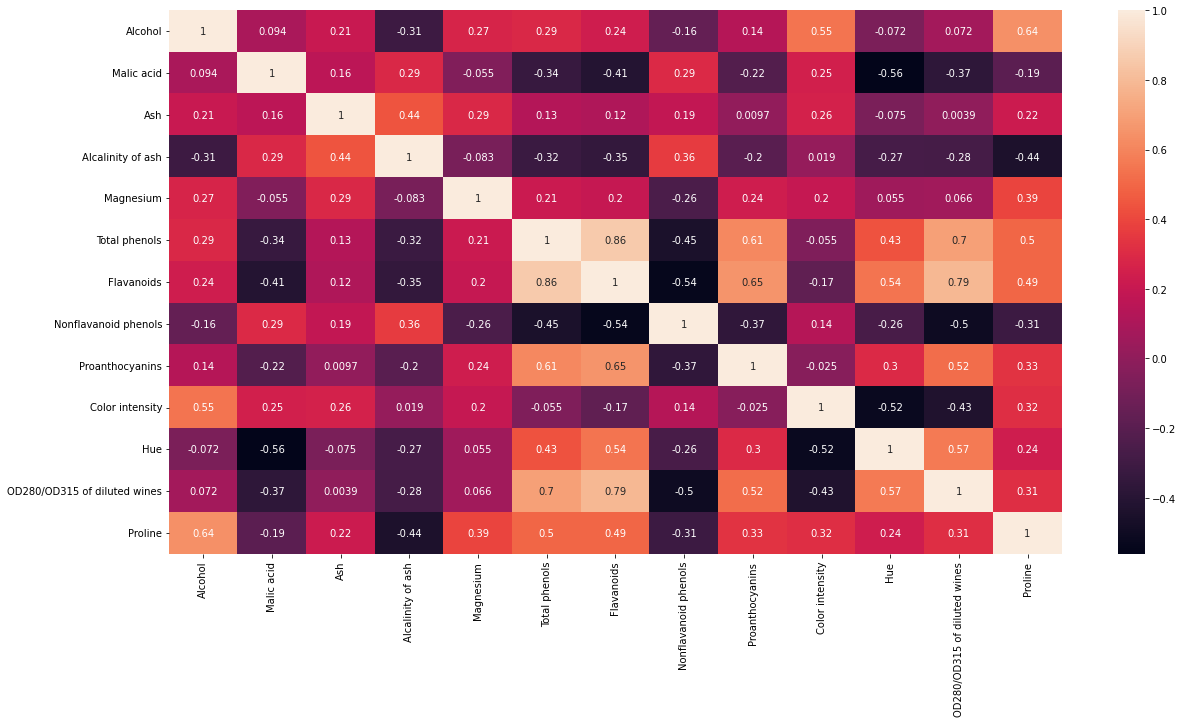

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, xticklabels= True, yticklabels =True)
plt.show()

**There seems to be a high correlation between Flavanoids and total phenols, and Flavanoids and OD280/OD315 of diluted wines**

## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler(with_mean=True,with_std=True)
scaler.fit(data)
scaled_data=scaler.transform(data)

In [ ]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()
pca.fit(scaled_data)

PCA()

In [ ]:
pip install pca

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


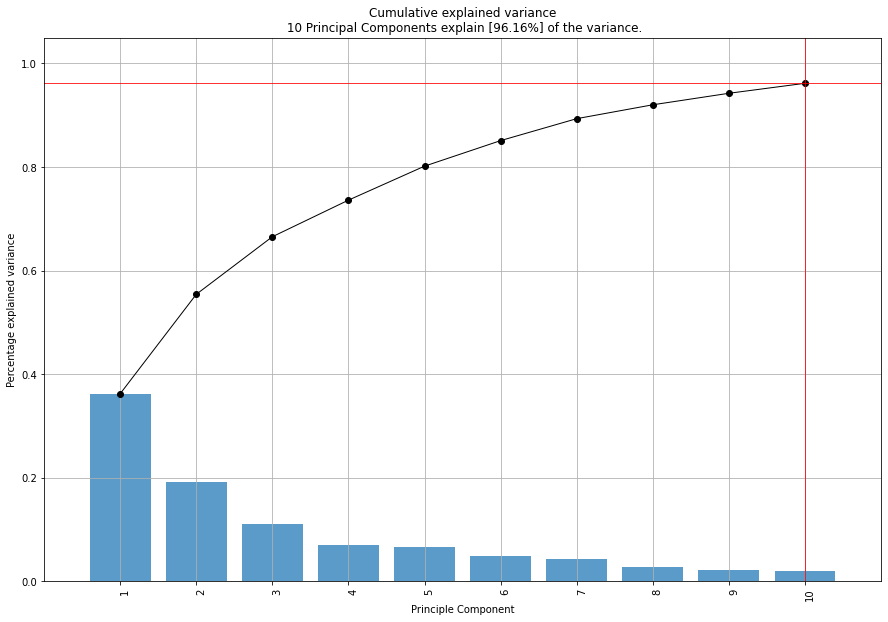

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

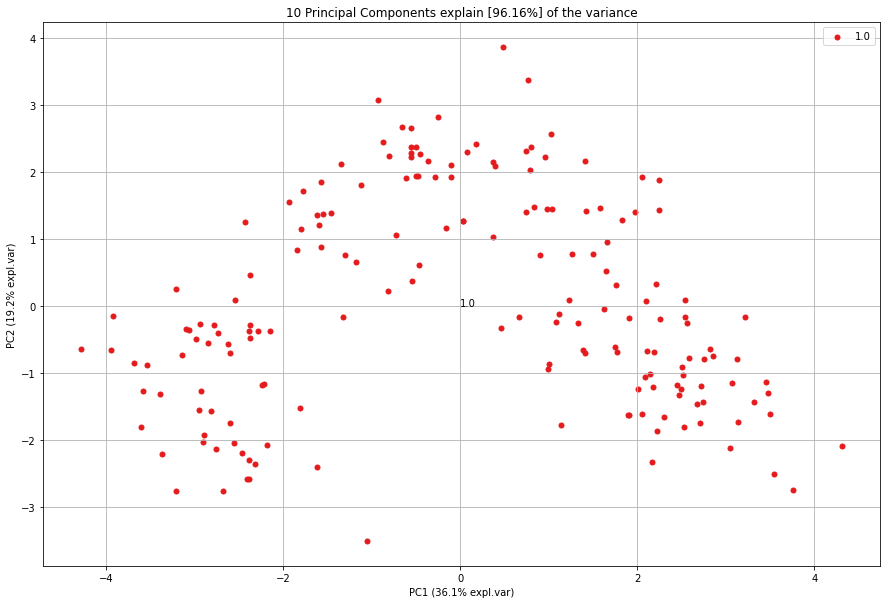

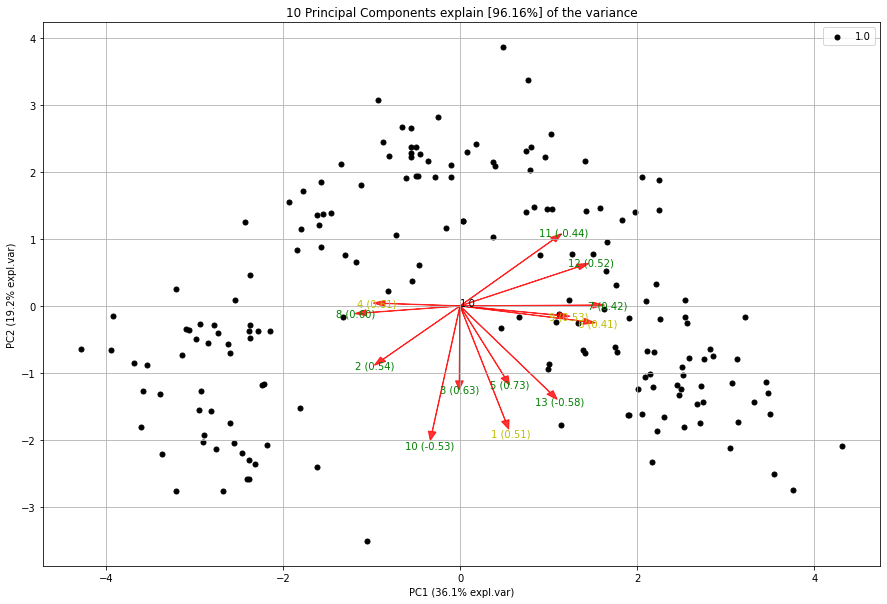

In [ ]:

from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Fit transform
results = model.fit_transform(scaled_data)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=13,cmap='copper')

*   We observe that there is an elbow at 3

*   Here there seems to be 3 clusters from the biplot
Features 11,12,7,9,6 that is, Hue,OD280/OD315 of diluted wines,Flavanoids,Proanthocyanins,Total phenols seem to be related;
Alcohol,Ash,Magnesium,Color intensity,Proline tend to be related; Malic acid, Alcalinity of ash and Nonflavanoid phenols seem to be related




In [ ]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(scaled_data)

In [ ]:
pcadf=pd.DataFrame(x_pca,columns=["PC1","PC2","PC3"])
pcadf.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [ ]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631]


## K means clustering

In [ ]:
from sklearn.cluster import KMeans

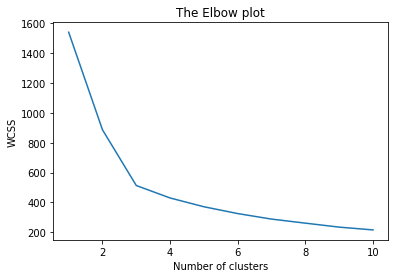

In [ ]:
# elbow method
wcss=[]
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(pcadf)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**We observe the elbow at k=3**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score


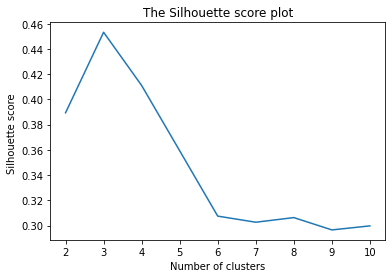

In [ ]:
score=[]
for i in range(2,11):
  km=KMeans(i)
  km.fit_predict(pcadf)
  score.append(silhouette_score(pcadf, km.labels_, metric='euclidean'))
number_clusters = range(2,11)
plt.plot(number_clusters,score)
plt.title('The Silhouette score plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score ')
plt.show()

**We observe the highest Silhouette score is for k=3**


**Hence we select k=3 for our KMeans clustering algorithm**

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(pcadf)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
kmeans.inertia_

513.0564645910769

In [ ]:
kmeans.n_iter_

6

In [ ]:
kmeans.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01]])

In [ ]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 51, 1: 62, 2: 65})

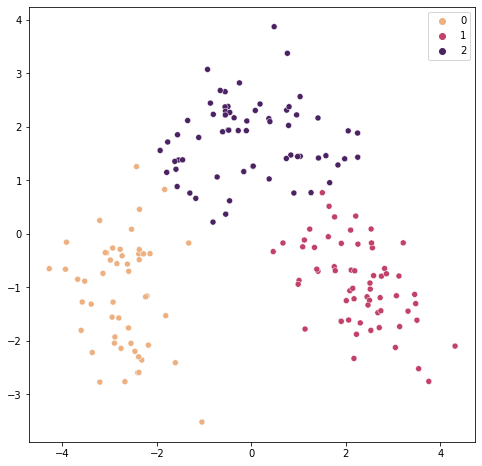

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=kmeans.labels_,palette='flare')
plt.show()

**The data has been clustered into 3 clusters labelled as 0,1,2 using K-Means clustering algorithm**

## K- Medoids Clustering

In [ ]:
pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

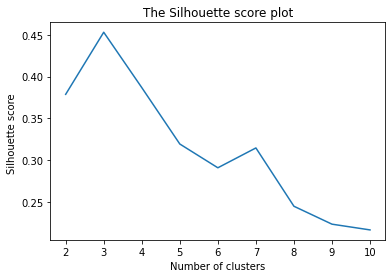

In [ ]:
score=[]
for i in range(2,11):
  kmd=KMedoids(i)
  kmd.fit_predict(pcadf)
  score.append(silhouette_score(pcadf, kmd.labels_))
number_clusters = range(2,11)
plt.plot(number_clusters,score)
plt.title('The Silhouette score plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score ')
plt.show()

In [ ]:
method=["alternate","pam"]
dist=["euclidean","manhattan","cosine"]
scores=[]
for i in method:
  for j in dist:
    kmed=KMedoids(n_clusters=3,metric=j,method=i).fit(pcadf)
    scores.append(silhouette_score(pcadf, kmed.labels_))
print(scores)

[0.4530804270167599, 0.4488938509223641, 0.42591033973319337, 0.4530804270167599, 0.45247615400131624, 0.4512572078734153]


**The Silhouette score is maximum for method="pam" as well as method="alternate" and metric="euclidean"**

In [ ]:
kmedoids = KMedoids(n_clusters=3,metric="euclidean",method="pam").fit(pcadf)

In [ ]:
# obtaining the cluster assignments
kmedoids.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
# obtaining the cluster medoids
kmedoids.cluster_centers_

array([[-2.80706372, -1.57053379, -0.47252793],
       [-0.27870275,  1.93056809,  0.07867055],
       [ 2.0845222 , -1.06113799, -0.16474668]])

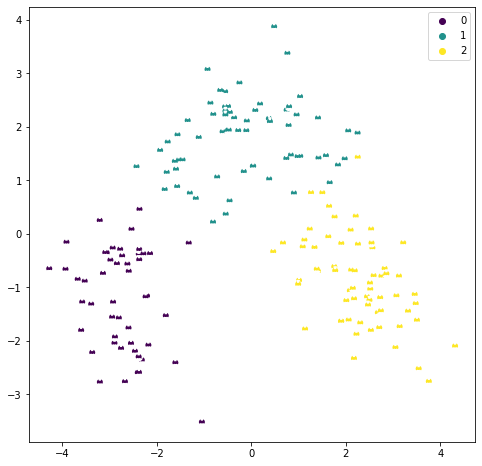

In [ ]:
plt.figure(figsize=(8,8))
kwargs  =   {'edgecolor':"w",
             'linewidth':3,
             'linestyle':':',
            }
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=kmedoids.labels_,palette='viridis',**kwargs)
plt.show()

**The data has been clustered into 3 clusters labelled as 0,1,2 using K-Medoids clustering algorithm**

## Gaussian Mixture Models

In GMM the n_components=k are the number of clusters. We have to obtain the mean and variance of each cluster's distribution.Here we consider that the data points are coming from the k normal distributions, that is , each data point belongs to one of the k normal distributions. Hence the k clusters. Now we have to determine the covariance type out of'full' (each component has its own general covariance matrix),'tied' (all components share the same general covariance matrix),'diag' (each component has its own diagonal covariance matrix),'spherical' (each component has its own single variance). The BIC criterion gives us an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have, and by extension, the true, unknown, distribution. In order to avoid overfitting, this technique penalizes models with big number of clusters.So we use the BIC measure. 

In [ ]:
from sklearn import mixture
import itertools

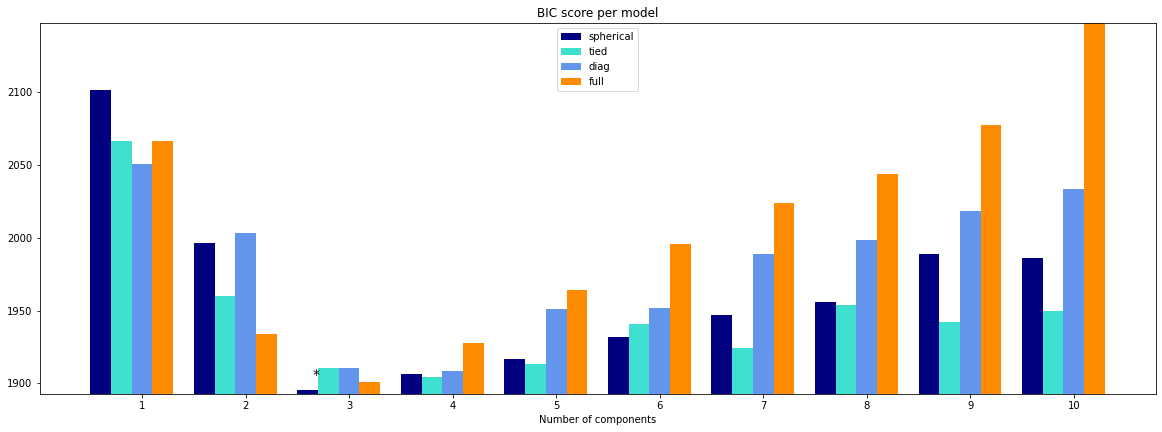

In [ ]:
lowest_bic = np.infty
bic = []
no_clusters = range(1, 11)
cv_types = ["spherical", "tied", "diag", "full"]
for i in cv_types:
  for j in no_clusters:
    # Fit a Gaussian mixture with EM
    gmm = mixture.GaussianMixture(n_components=j, covariance_type=i)
    gmm.fit(pcadf)
    bic.append(gmm.bic(pcadf))
    if bic[-1] < lowest_bic:
      lowest_bic = bic[-1]
      best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []
# Plot the BIC scores
plt.figure(figsize=(20, 15))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(no_clusters) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(no_clusters) : (i + 1) * len(no_clusters)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(no_clusters)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(no_clusters))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(no_clusters))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)
plt.show()


**We observe the lowest BIC score is for n_components=3 and covariance type=spherical. Hence we fit the GMM model with these parameters**

In [ ]:
# Fit a Gaussian mixture with EM
gmm = mixture.GaussianMixture(n_components=3, covariance_type="spherical")
gmm.fit(pcadf)

GaussianMixture(covariance_type='spherical', n_components=3)

In [ ]:
gmm_label=gmm.predict(pcadf)
gmm_label

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
#number of observations in each cluster
from collections import Counter
Counter(gmm_label)

Counter({0: 48, 1: 49, 2: 81})

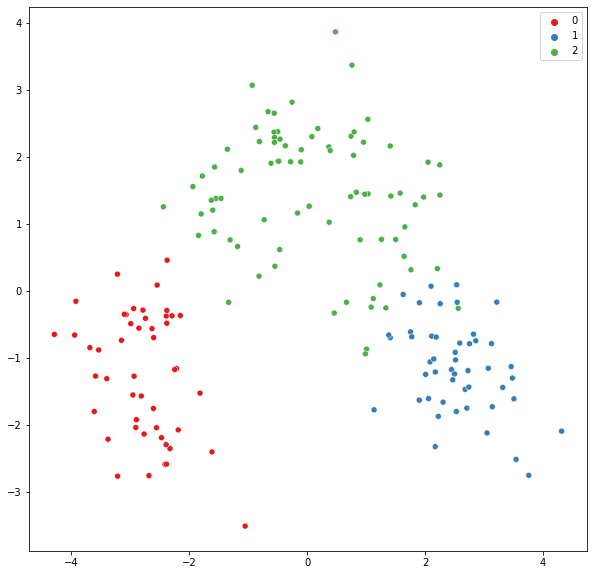

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=gmm.predict(pcadf),palette='Set1')
plt.show()

**The data has been clustered into 3 clusters labelled as 0,1,2 using Gaussian Mixture Model clustering algorithm**

## Hierarchical Clustering

Hierarchical Clustering is a cluster analysis method which produces a  tree-based representation of data. Objects in the dendrogram are linked together based on their similarity. Hierarchical clustering can be of two types: Agglomerative and Divisive. In Agglomerative HCA, it is a bottom up approach. Here first we consider that each observation is an independent cluster. Hence with n observations, we have n clusters at the beginning.Then we cluster the closest two clusters together to merge them into a single cluster. Hence we now have n-1 clusters. We keep on doing this until we have one single cluster containing all the datapoints. Hence here the distance between two clusters is important. There are various ways to calculate the distance between two clusters, and these ways decide the rule for clustering. These measures are called Linkage methods.The popular linkage methods are:
1. Maximum or complete linkage: The distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce more compact clusters.
2. Minimum or single linkage: The distance between two clusters is defined as the minimum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce long, “loose” clusters.
3. Mean or average linkage: The distance between two clusters is defined as the average distance between the elements in cluster 1 and the elements in cluster 2.
4. Centroid linkage: The distance between two clusters is defined as the distance between the centroid for cluster 1 (a mean vector of length p variables) and the centroid for cluster 2.
5. Ward’s minimum variance method: It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged.

We can use a dendrogram to visualize the history of groupings and figure out the optimal number of clusters.
1. Determine the largest vertical distance that doesn’t intersect any of the other clusters
2. Draw a horizontal line at both extremities
3. The optimal number of clusters is equal to the number of vertical lines going through the horizontal line


### Agglomerative Hierarchical Clustering

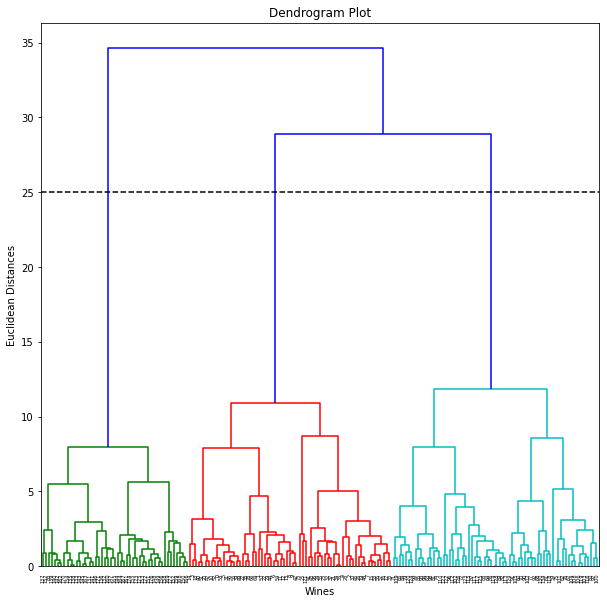

In [ ]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10,10)) 
dendro = shc.dendrogram(shc.linkage(pcadf, method="ward")) 
plt.axhline(y=25,color="black",linestyle="--") 
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Wines")  
plt.show()

**We have the longest vertical line in the range 12-28. So we draw a horizontal line at y=25 to obtain the number of clusters. Since there are 3 cuts to the horizontal line, the number of clusters is 3**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
linkage=['complete', 'average', 'single']
affinity=["euclidean","manhattan","cosine"]
s_scores=[]
max_score=-1
for i in affinity:
  for j in linkage:
    agg=AgglomerativeClustering(n_clusters=3, affinity=i, linkage=j,).fit(pcadf)
    s_scores.append(silhouette_score(pcadf, agg.labels_))
    if s_scores[-1]>max_score:
      aff=i
      link=j
print(aff,link)


cosine single


In [ ]:
cos_single=silhouette_score(pcadf,AgglomerativeClustering(n_clusters=3, affinity="cosine", linkage="single").fit(pcadf).labels_ )
cos_single

0.009694079148702454

In [ ]:
euclidean_ward=silhouette_score(pcadf,AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward").fit(pcadf).labels_ )
euclidean_ward

0.4459492198062967

**Clearly the silhouette score is maximum for affinity="euclidean" and linkage="ward"**

In [ ]:
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward',)
agg.fit(pcadf)

AgglomerativeClustering(n_clusters=3)

In [ ]:
agg.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
#number of observations in each cluster
from collections import Counter
Counter(agg.labels_)

Counter({0: 66, 1: 47, 2: 65})

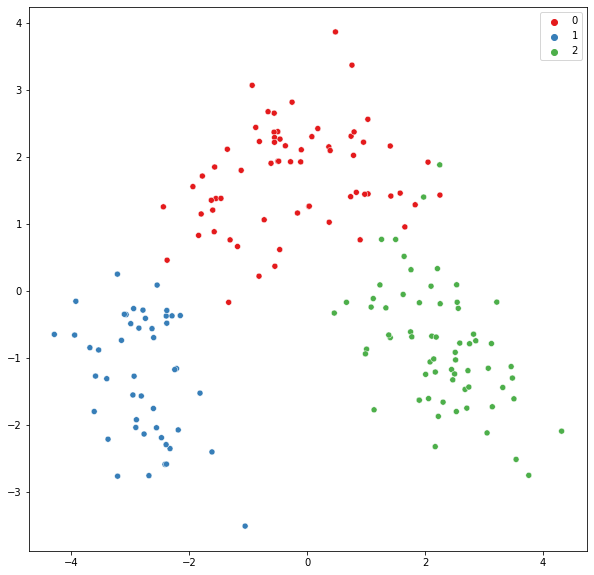

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=agg.labels_,palette='Set1')
plt.show()

**The data has been clustered into 3 clusters labelled as 0,1,2 using Agglomerative Hierarchical clustering algorithm**

## Spectral Clustering

There are two approaches for clustering. One of them is connectivity.Points that are connected or immediately next to each other are put in the same cluster. Even if the distance between 2 points is less, if they are not connected, they are not clustered together. Spectral clustering is a technique that follows this approach.
Spectral Clustering is a more complex clustering method that is based on the graph theory. In this, set of nodes in a graph are identified based on edges that connect them.In spectral clustering, the data points are treated as nodes of a graph. Thus, clustering is treated as a graph partitioning problem. An important point to note is that no assumption is made about the shape/form of the clusters.
First it uses information from the spectrum(or eigen values) of the similarity matrix to perform dimensionality reduction on the data. Next it builds the graph and finally it performs the clustering


In [ ]:
from sklearn.cluster import SpectralClustering

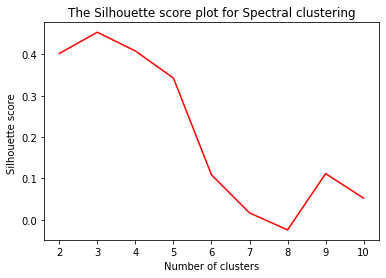

In [ ]:
spec_scores=[]
for j in range(2,11):
  spec=SpectralClustering(n_clusters = j).fit(pcadf)
  spec_scores.append(silhouette_score(pcadf,spec.labels_))
number_clusters = range(2,11)
plt.plot(number_clusters,spec_scores,color="red")
plt.title('The Silhouette score plot for Spectral clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score ')
plt.show()


**The maximum silhouette score is for 3 clusters**

In [ ]:
# List of different values of affinity
affinity = ['rbf', 'nearest_neighbors']
  
# List of Silhouette Scores
s_scores = []
  
# Evaluating the performance
s_scores.append(silhouette_score(pcadf, SpectralClustering(n_clusters = 3,affinity=affinity[0],).fit(pcadf).labels_))
s_scores.append(silhouette_score(pcadf,SpectralClustering(n_clusters = 3,affinity=affinity[1]).fit(pcadf).labels_))
print(s_scores)

[0.45375978878650924, 0.4533352297838753]


**Clearly affinity="rbf" has a larger Silhouette score**

**Hence we fit the model with the optimal parameters**

In [ ]:
specs=SpectralClustering(n_clusters = 3,affinity="rbf")
specs.fit(pcadf)
specs.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
silhouette_score(pcadf, specs.labels_)

0.45375978878650924

In [ ]:
#number of observations in each cluster
from collections import Counter
Counter(specs.labels_)

Counter({0: 64, 1: 63, 2: 51})

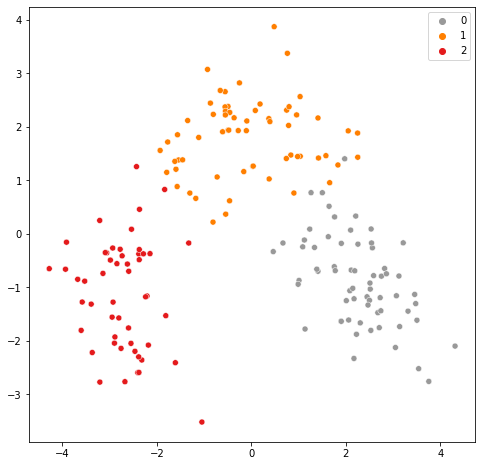

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=specs.labels_,palette='Set1_r')
plt.show()

**The data has been clustered into 3 clusters labelled as 0,1,2 using Spectral clustering algorithm**

**We have obtained 5 different clustering models for our data and noted the results**

## Model Comparison

We will plot the clustering given by different models

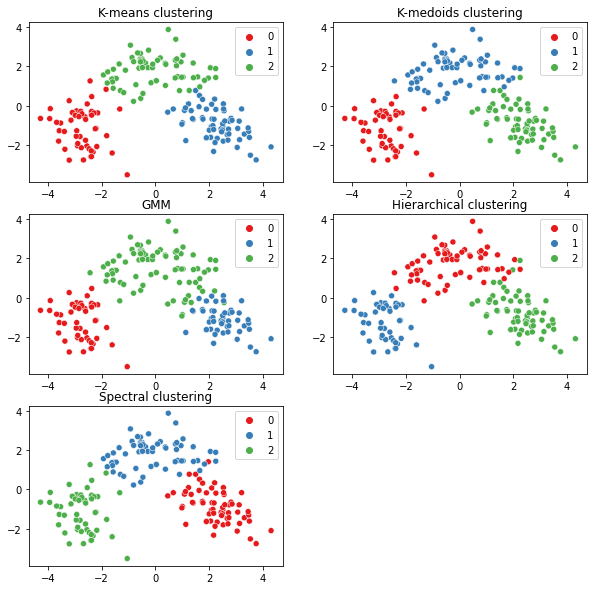

In [ ]:
ax=[]
names=["K-means clustering","K-medoids clustering","GMM","Hierarchical clustering","Spectral clustering"]
comp=[kmeans.labels_,kmedoids.labels_,gmm.predict(pcadf),agg.labels_,specs.labels_]
fig=plt.figure(figsize=(10,10))
for i in range(0,5):
  ax.append(fig.add_subplot(3,2,(i+1)))
  sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=comp[i],ax=ax[i],palette="Set1")
  ax[i].set_title(names[i])
plt.show()

**Not much difference is visible in the different clustering algorithms**

### Evaluating the clustering algorithms

The Davies–Bouldin index is a metric for evaluating clustering algorithms where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset.
Lower the DB index value, better is the clustering

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
row_names=['Algorithm','Silhouette score','DB index']
alg=["K-Means","K-medoids","GMM","Hierarchical","Spectral"]
comp=[kmeans.labels_,kmedoids.labels_,gmm.predict(pcadf),agg.labels_,specs.labels_]
d={}
for i in range(0,5):
    d[i]=[alg[i],silhouette_score(pcadf,comp[i]),davies_bouldin_score(pcadf,comp[i])]
d
table=pd.DataFrame(d,index=row_names)
table

,0,1,2,3,4
Algorithm,K-Means,K-medoids,GMM,Hierarchical,Spectral
Silhouette score,0.4538,0.45308,0.424347,0.445949,0.45376
DB index,0.838856,0.842351,0.84693,0.851522,0.839816


**From the above table it can be observed that the clustering algorithms perform almost in a similar way. The Silhouette score is maximum and the DB index is minimum for K-Means algorithm. Hence it can be concluded that K-Means is the best clustering algorithm for our data**

We are given the dataset with the class classifications. Hence we can use it to calculate the accuracy of each algorithm.
Note that this is an unsupervised problem. We have got the actual data with the class labels which is an added advantage 

In [ ]:
test_data=pd.read_csv("testdata.csv")
test_data.head()

,Class Identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#number of observations in each cluster
from collections import Counter
Counter(test_data["Class Identifier"])

Counter({1: 59, 2: 71, 3: 48})

**From the test data we observe that the first 59 observations belong to one class,next 71 observations belong to another class and the last 48 observations belong to yet another class**

**We define a function to calculate the misclassification for every algorithm and hence calculate the accuracy of each algorithm**

In [ ]:
def misclassify(a,b,alg):
    count_0=count_1=count_2=0
    tot=0
    tot=b-a
    maxm=0
    mis=0
    for i in range(a,b):
      if(alg[i]==0):
        count_0 +=1
      if(alg[i]==1):
        count_1 +=1
      if(alg[i]==2):
        count_2 +=1
    maxm=max(count_0,count_1,count_2)
    mis=tot-maxm
    return mis


In [ ]:
accuracy=[0]*5
k=0
comp=[kmeans.labels_,kmedoids.labels_,gmm.predict(pcadf),agg.labels_,specs.labels_]
for i in comp:
  corr=[0]*3
  corr[0]=misclassify(0,59,i)
  corr[1]=misclassify(59,130,i)
  corr[2]=misclassify(130,178,i)
  accuracy[k]=(178-(sum(corr)))/178
  k=k+1
accuracy


[0.9662921348314607,
 0.9662921348314607,
 0.9213483146067416,
 0.949438202247191,
 0.9550561797752809]

In [ ]:
row_names=['Algorithm','Accuracy']
alg=["K-Means","K-medoids","GMM","Hierarchical","Spectral"]
comp=[kmeans.labels_,kmedoids.labels_,gmm.predict(pcadf),agg.labels_,specs.labels_]
d={}
for i in range(0,5):
    d[i]=[alg[i],accuracy[i]]
d
table=pd.DataFrame(d,index=row_names)
table

,0,1,2,3,4
Algorithm,K-Means,K-medoids,GMM,Hierarchical,Spectral
Accuracy,0.966292,0.966292,0.921348,0.949438,0.955056


**We observe that all the algorithms have good accuracy. The best is for K-Means and K-medoids.**

As we have seen that K-means is the best algorithm among the 5 algorithms, here we note that it also has a very high accuracy

In [ ]:
newdf=data
newdf["Cluster"]=kmeans.labels_
newdf.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


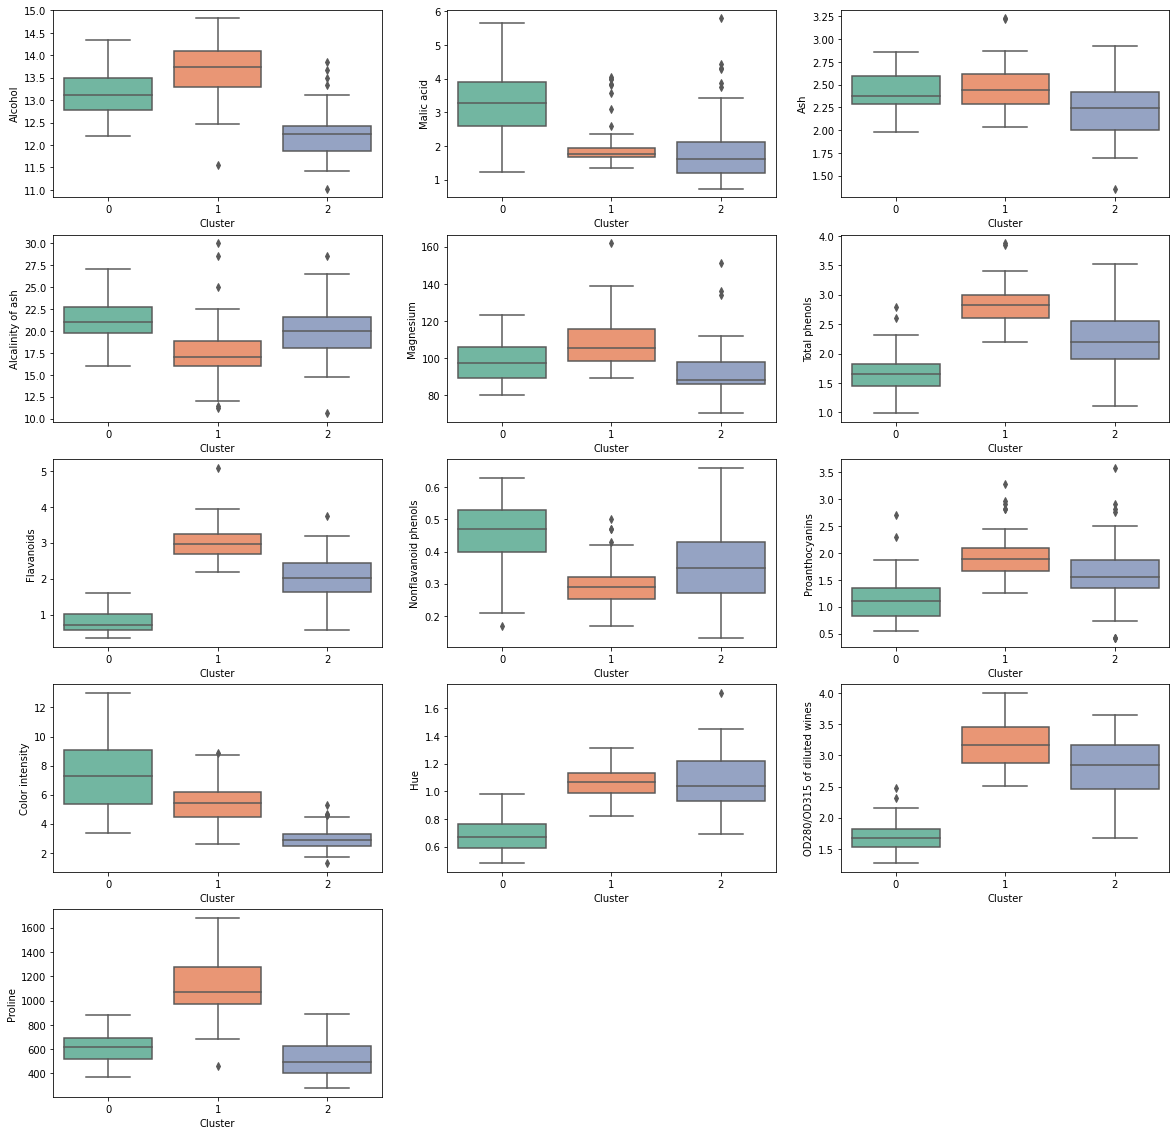

In [ ]:
ax=[]
names=newdf.columns
fig=plt.figure(figsize=(20,20))
for i in range(13):
  ax.append(fig.add_subplot(5,3,(i+1)))
  sns.boxplot(x="Cluster",y=names[i],data=newdf,ax=ax[i],palette="Set2")
  
plt.show() 

Hence we can infer that the different wines in this dataset can be divided into three groups on the basis of the different variables